# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

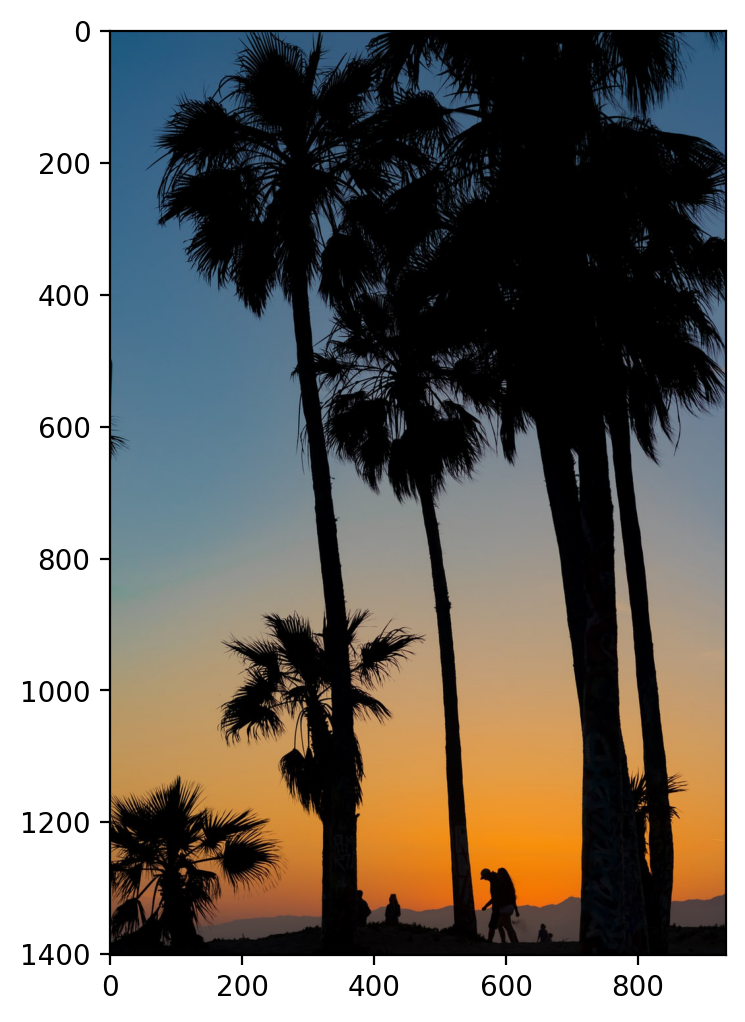

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means reducing the number of unique colors here to K unique colors. 

Here I try to reduce the number of unique colors to 6!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=6)

In [10]:
model

KMeans(n_clusters=6)

In [11]:
labels = model.fit_predict(image_as_array2d)

In [12]:
labels

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [13]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[  2.7513742 ,   2.57014533,   3.69464903],
       [137.23664118, 143.89654236, 143.80804617],
       [192.23892352, 154.50840087, 108.69784869],
       [ 67.18740151,  61.47573275,  61.94011976],
       [ 71.13439733, 109.27169232, 137.6803933 ],
       [219.17325393, 135.05663477,  46.29157967]])

In [14]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [15]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [192, 155, 109],
       [ 67,  61,  62],
       [ 71, 109, 138],
       [219, 135,  46]])

Reshape 2d array image, which is rgb_codes[labels], into 3d array image which looks like this (h, w, c)

In [16]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [17]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  61,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  61,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

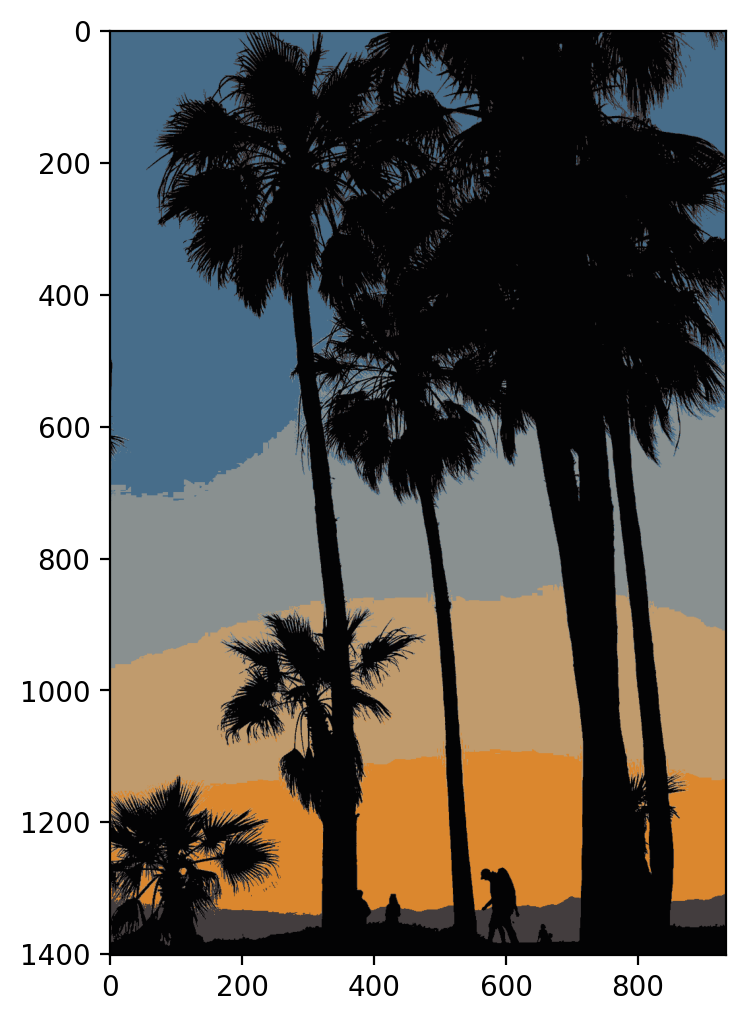

In [18]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)